<small><small><i>
All the IPython Notebooks in this **Python Decision Tree and Random Forest** series by Dr. Milaan Parmar are available @ **[GitHub](https://github.com/milaan9/90_Python_Examples)**
</i></small></small>

# Visualize a Decision Tree on Iris dataset

A Decision Tree is a supervised algorithm used in machine learning. It is using a binary tree graph (each node has two children) to assign for each data sample a target value. The target values are presented in the tree leaves. To reach to the leaf, the sample is propagated through nodes, starting at the root node. In each node a decision is made, to which descendant node it should go. A decision is made based on the selected sample’s feature. Decision Tree learning is a process of finding the optimal rules in each internal tree node according to the selected metric.

The decision trees can be divided, with respect to the target values, into:

1. Classification trees used to classify samples, assign to a limited set of values - classes. In scikit-learn it is **`DecisionTreeClassifier`**.
2. Regression trees used to assign samples into numerical values within the range. In scikit-learn it is **`DecisionTreeRegressor`**.

Decision trees are a popular tool in decision analysis. They can support decisions thanks to the visual representation of each decision.

Below we'll learn  5 ways to visualize Decision Tree in Python:

1. print text representation of the tree with **`sklearn.tree.export_text`** method
2. plot with **`sklearn.tree.plot_tree`** method (**`matplotlib`** needed)
3. plot with **`sklearn.tree.export_graphviz`** method (**`graphviz`** needed)
4. plot with **`StringIO()`** and **`sklearn.export_graphviz`** method (**`graphviz`** and **`pydotplus`** needed)
5. plot with **`dtreeviz`** package (**`dtreeviz`** and **`graphviz`** needed)

We'll learn how to visualize trees on classification and regression tasks.

## Train Decision Tree on Classification Task

We'll train a **`DecisionTreeClassifier`** on **Iris** dataset and we'll also use default hyper-parameters for the classifier.

<div>
<img src="img/iris.png" width="500"/>
</div>

<div>
<img src="img/irisFlow.png" width="525"/>
</div>

### Install necessary modules

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing necessary modules

import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
# Loading the dataset
iris = datasets.load_iris()

# Forming the iris dataframe
# X=iris.data
X_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(X_df.head(15))

Y=iris.target
print("\nClass Labels for all the data points:\n", Y)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2

In [6]:
# Defining Decision Tree Algorithm

# Fit the classifier with default hyper-parameters
dtree = DecisionTreeClassifier()   # (random_state=1234)
model=dtree.fit(X_df,Y)

## Method 1: Print Text Representation

Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file. You can check details about **`export_text`** in the **[sklearn docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text)**.

In [7]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



To save the figure to the **.txt** file:

In [8]:
# If you want to save it to the file, it can be done with following code:

with open("output_DecisionTree/iris_DecisionTree_text.txt", "w") as fout:
    fout.write(text_representation)

---

## Method 2: Plot Tree with `plot_tree`

The **`plot_tree`** method was added to **sklearn** in version 0.21. It requires **matplotlib** to be installed. It allows us to easily produce figure of the tree (without intermediate exporting to **graphviz**) The more information about plot_tree arguments are in the **[docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)**.

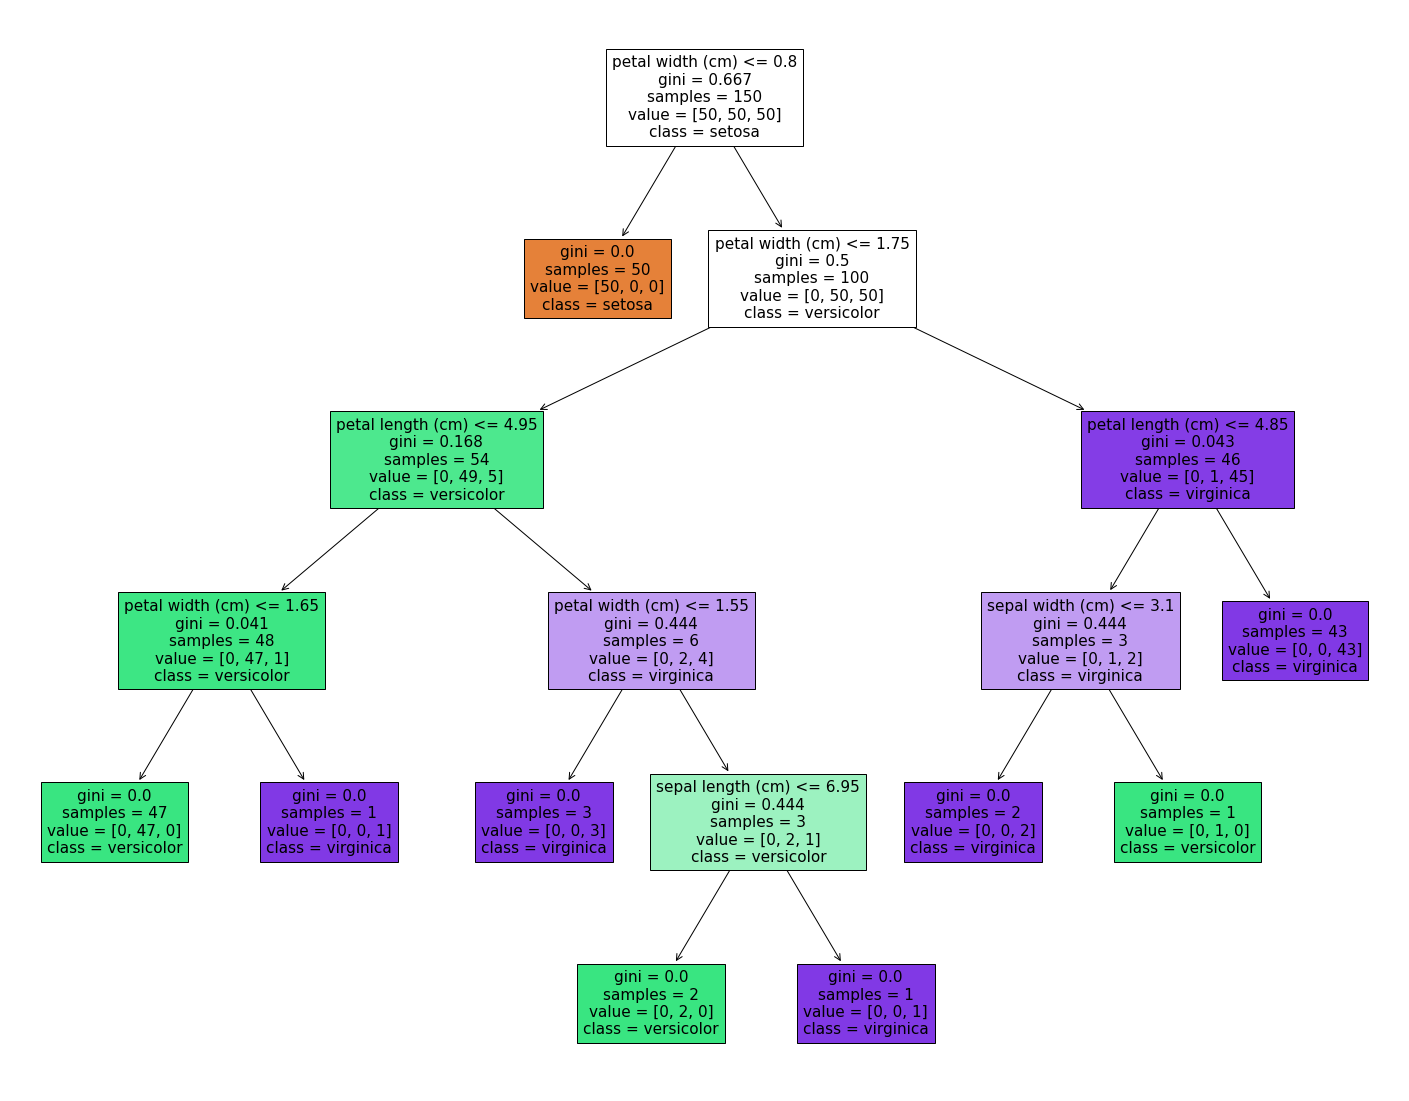

In [9]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

>**Note:** The **`plot_tree`** returns annotations for the plot, to not show them in the notebook we've assigned returned value to **`_`**.

To save the figure to the **`.png`** and **`.pdf`** file:

In [10]:
fig.savefig("output_DecisionTree/iris_DecisionTree_plotTree.png")

#fig.savefig("output_DecisionTree/iris_DecisionTree_plotTree.pdf")

>**Note:** We're using **`filled=True`** in the **`plot_tree`**. When this parameter is set to **`True`** the method uses color to indicate the majority of the class. (It will be nice if there will be some legend with class and color matching.)

---

## Method 3: Plot Decision Tree with `graphviz`

Please make sure that you have **`graphviz`** installed (as shown below). To plot the tree first we need to export it to DOT format with **`export_graphviz`** method (**[docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)**). Then we can plot it in the notebook or save to the file.

### Install necessary modules

In [11]:
!pip install pydotplus

In [12]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [13]:
conda install graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


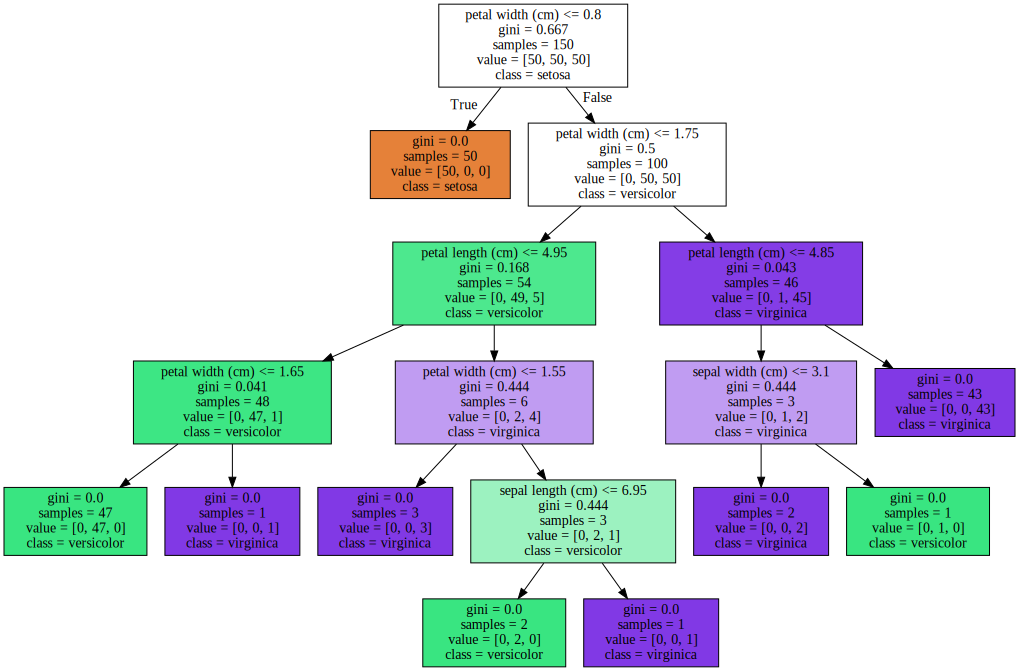

In [14]:
# METHOD 3.1:

# Importing necessary modules

import graphviz

# DOT format data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw Decision Tree
graph = graphviz.Source(dot_data, format="png")  # change "png" to "pdf" for PDF format
graph

To save the figure to the **file format** assigned in code above:

In [15]:
graph.render("output_DecisionTree/iris_DecisionTree_graphivz1")

'output_DecisionTree/iris_DecisionTree_graphivz1.png'

Import Successful


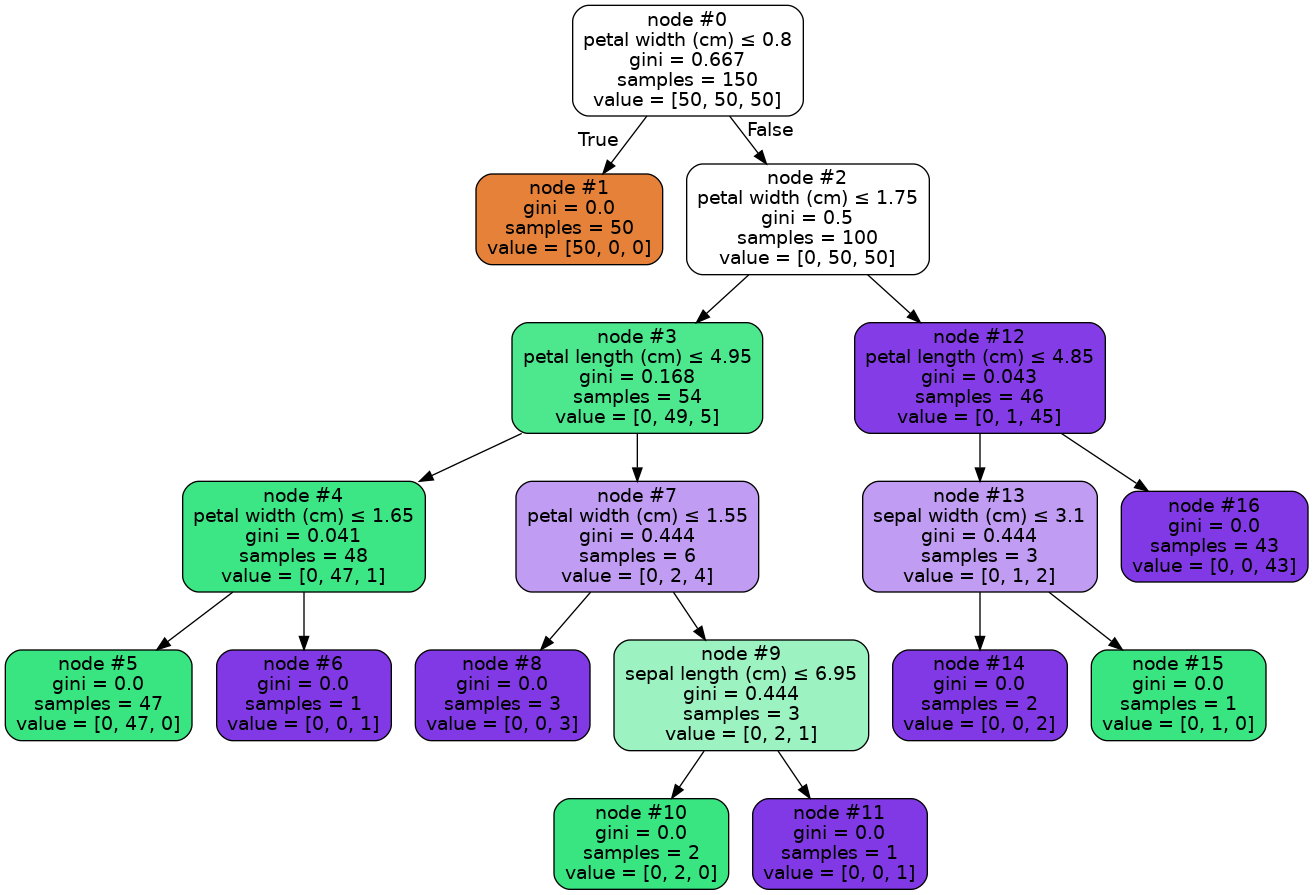

In [16]:
# METHOD 3.2:

# Importing necessary modules

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
print("Import Successful")

# Visualizing Decision Tree

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, 
                feature_names = iris.feature_names, 
                filled = True, rounded = True, 
                special_characters = True, node_ids = True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

# Generate .png image of "Decision Tree"
Image(graph.create_png())

To save the figure to the **`.png`** and **`.pdf`** file:

In [17]:
graph.write_png("output_DecisionTree/iris_DecisionTree_graphivz2.png")

# graph.write_pdf("output_DecisionTree/iris_DecisionTree_graphivz2.pdf")

True

---

## Method 3: Plot Decision Tree with `dtreeviz` Package

The **`dtreeviz`** package is available in github. It can be installed with pip install **`dtreeviz`**. It requires graphviz to be installed (but you dont need to manually convert between DOT files and images). To plot the tree just run:

### Install necessary module

In [18]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


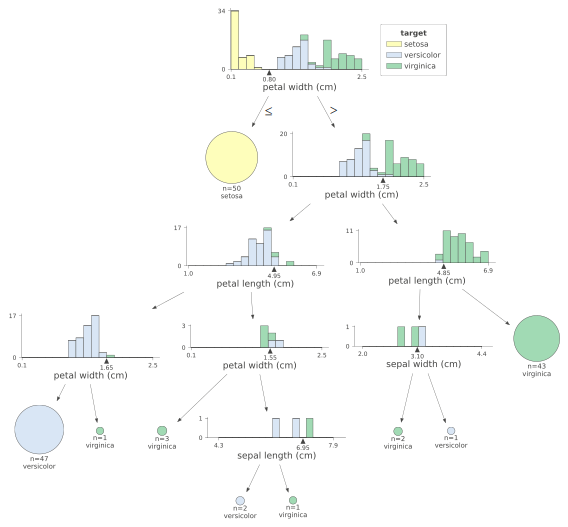

In [19]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dtree, X_df, Y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

To save the figure to the **`.svg`** file:

In [20]:
viz.save("output_DecisionTree/iris_DecisionTree_dtreeviz.svg")

---

## Method 4: Visualizing the Decision Tree in Regression Task

Below, we'll learn all 4 methods for **`DecisionTreeRegressor`** from scikit-learn package (in python of course).

In [21]:
# Importing necessary modules

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [22]:
# Prepare the data 
boston = datasets.load_iris()
X = iris.data
Y = iris.target

To keep the size of the tree small, I set **`max_depth = 3`**.

In [23]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, Y)

In [24]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- value: [0.00]
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- value: [1.02]
|   |   |--- feature_2 >  4.95
|   |   |   |--- value: [1.67]
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- value: [1.67]
|   |   |--- feature_2 >  4.85
|   |   |   |--- value: [2.00]



To save the figure to the **.txt** file:

In [25]:
# If you want to save it to the file, it can be done with following code:

with open("output_DecisionTree/iris_DecisionTree_regression1.txt", "w") as fout:
    fout.write(text_representation)

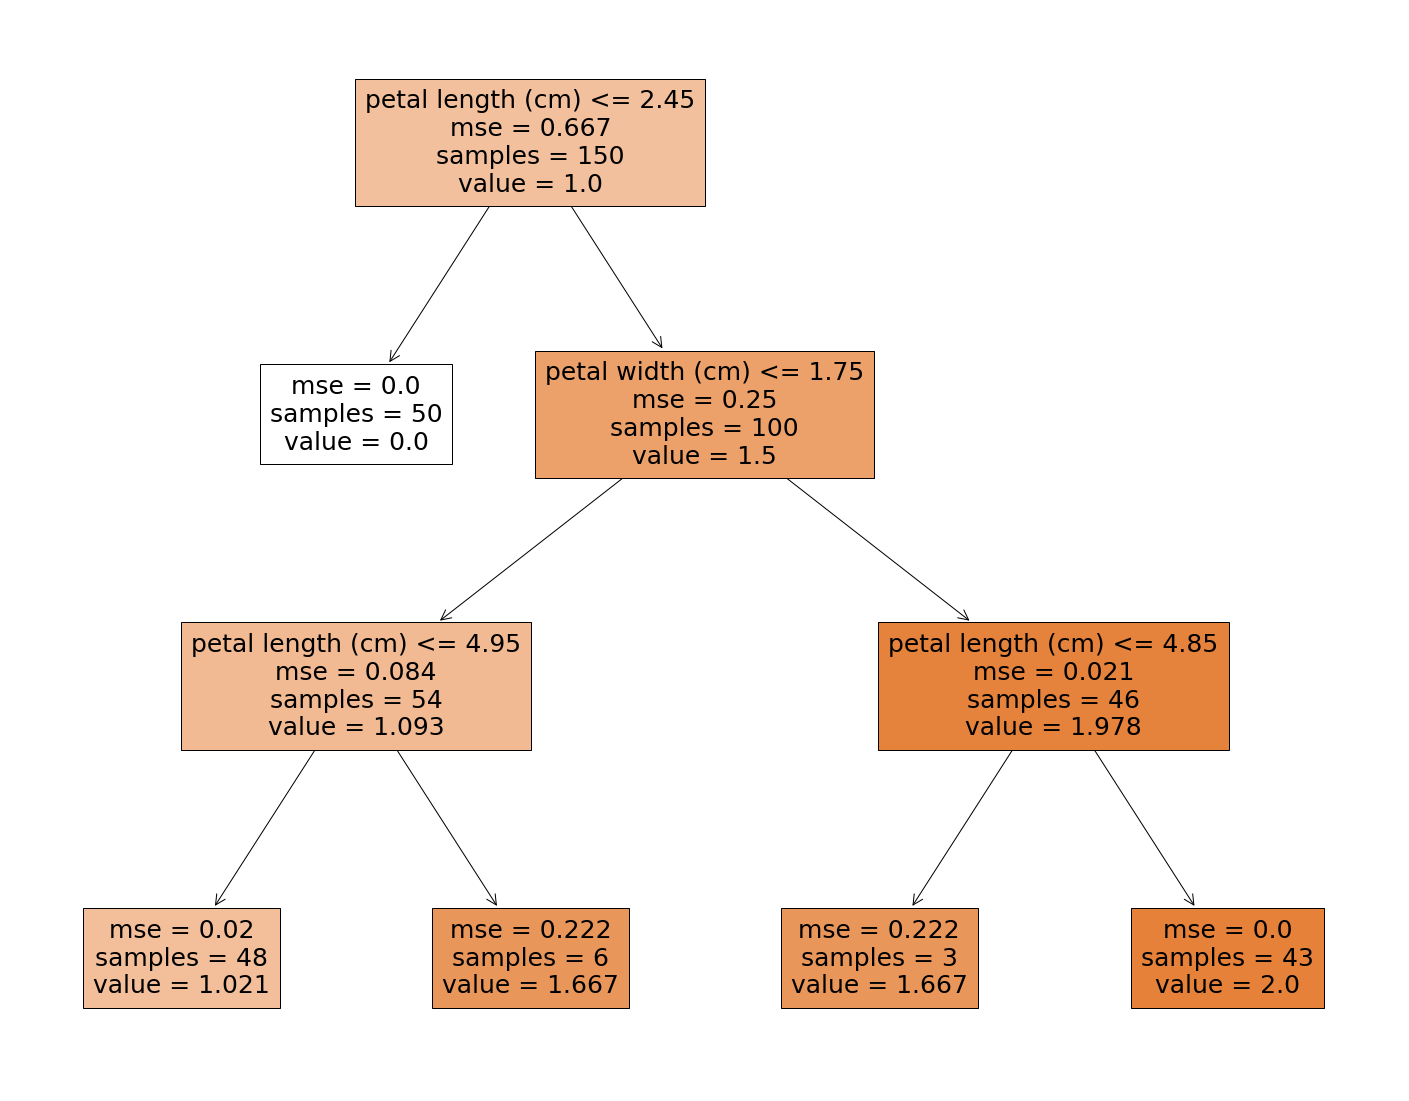

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=iris.feature_names, filled=True)

>**Note:** The color of the leaf is coresponding to the predicted value.

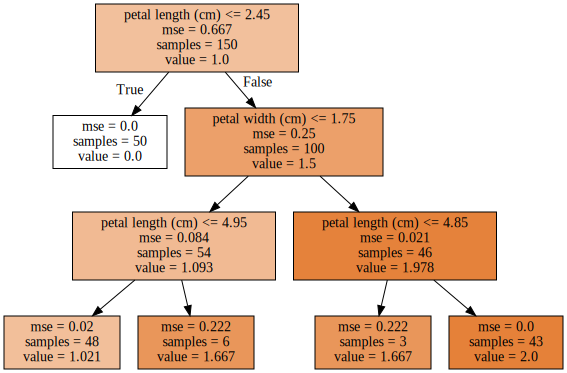

In [27]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=iris.feature_names,  
                                filled=True)
# Draw Decision Tree
graph=graphviz.Source(dot_data, format="png")  # change "png" to "pdf" for PDF format
graph

To save the figure to the **file format** assigned in code above:

In [28]:
graph.render("output_DecisionTree/iris_DecisionTree_regression2")

'output_DecisionTree/iris_DecisionTree_regression2.png'

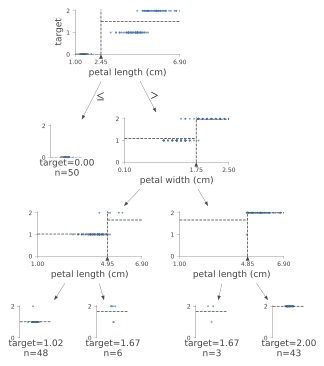

In [29]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regr, X, Y,
                target_name="target",
                feature_names=iris.feature_names)
viz

In [30]:
viz.save("output_DecisionTree/iris_DecisionTree_regression3.svg")

From above methods visualizing with **`dtreeviz`** package is very convenient and efficient because:

1. it shows the distribution of decision feature in the each node (nice!)
2. it shows the class-color matching legend
3. it shows the distribution of the class in the leaf in case of classification tasks, and mean of the leaf's response in the case of regression tasks

It would be great to have **`dtreeviz`** visualization in the interactive mode, so the user can dynamically change the depth of the tree. 